In [20]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.legend as mlegend

from sklearn.metrics import roc_auc_score

In [21]:
model_path = "/dtu/p1/johlau/Thesis-Synthex/models/"
model_files = os.listdir(model_path)

model_types = [
    "baseline",
    "drr-center",
    "drr-2",
    "drr-5",
    "drr-10",
    "synthex-center",
    "synthex-2",
    "synthex-5",
    "synthex-10"
]

model_histories = {model_type:[pd.read_json(model_path + file) for file in model_files if file.startswith(model_type) and file.endswith(".json")] for model_type in model_types}
model_histories.keys()

dict_keys(['baseline', 'drr-center', 'drr-2', 'drr-5', 'drr-10', 'synthex-center', 'synthex-2', 'synthex-5', 'synthex-10'])

# Training and validation results

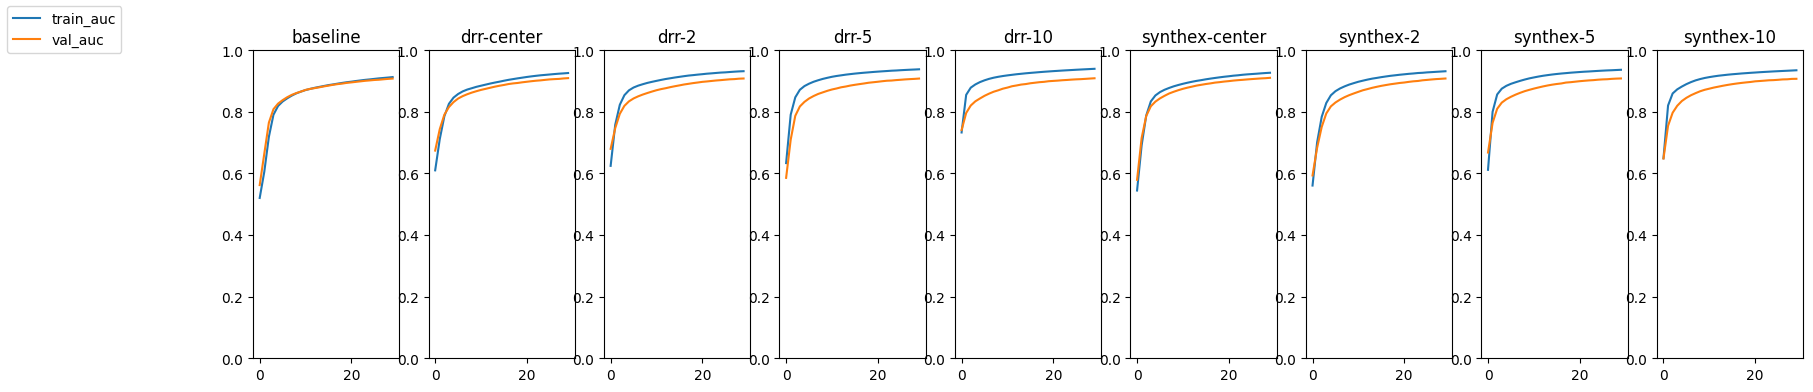

In [22]:
fig, axs = plt.subplots(1, len(model_histories.keys()), figsize=(20, 4))

for idx, key in enumerate(model_histories.keys()):
    axs[idx].plot(np.average([i["auc"] for i in model_histories[key]], axis=0))
    axs[idx].plot(np.average([i["val_auc"] for i in model_histories[key]], axis=0))
    axs[idx].set_ylim(0,1)
    axs[idx].set_title(f"{key}")



labels=["train_auc","val_auc"]

#handles, labels = axs[-1].get_legend_handles_labels()
legend = fig.legend(labels, loc="upper left")


plt.show()

# Test results

In [23]:
# Function for creating the n-hot encoding
def get_n_hot_encoding(df, labels_to_encode):
    enc = np.zeros((len(df), len(labels_to_encode)))
    for idx, row in df.iterrows():
        for ldx, l in enumerate(labels_to_encode):
            if row[l] == 1:
                enc[idx][ldx] = 1
    return enc

In [24]:
results_dir = "/dtu/p1/johlau/Thesis-Synthex/predictions/"
data_dir = "/dtu/p1/johlau/Thesis-Synthex/data/"
result_files = os.listdir(results_dir)

In [25]:
types_df = pd.DataFrame({
    "Model":model_types
})

## ChestX-Ray14

In [26]:
chestx_ray14_test = pd.read_csv(data_dir+ "chestx_ray14_test.csv")
labels_to_encode = ['Effusion', 'Pneumothorax', 'Atelectasis', 'Cardiomegaly', 'Pneumonia']
chestx_ray14_true = get_n_hot_encoding(chestx_ray14_test, labels_to_encode)
chestx_ray14_predictions = {model_type:[pd.read_json(results_dir + file) for file in result_files if file.startswith("chestx_ray14_" + model_type) and file.endswith(".json")] for model_type in model_types}


In [27]:
results = list()
spread_results = list()

for model_type in model_types:

    auc_score = np.average([roc_auc_score(chestx_ray14_true,preds, average=None) for preds in chestx_ray14_predictions[model_type]],axis= 0)
    auc_spread = np.std([roc_auc_score(chestx_ray14_true,preds, average=None) for preds in chestx_ray14_predictions[model_type]],axis= 0)
    #auc_score.append(model_type)




    output_spread = pd.DataFrame([auc_spread], columns=labels_to_encode)
    spread_results.append(output_spread)
    output = pd.DataFrame([auc_score], columns=labels_to_encode)
    results.append(output)

chestx_ray14_results_df = pd.concat(results)
chestx_ray14_results_df = types_df.merge(chestx_ray14_results_df.reset_index(drop=True),left_index=True, right_index=True)
print(chestx_ray14_results_df)

chestx_ray14_results_spread_df = pd.concat(spread_results)
chestx_ray14_results_spread_df = types_df.merge(chestx_ray14_results_spread_df.reset_index(drop=True),left_index=True, right_index=True)
print(chestx_ray14_results_spread_df)

            Model  Effusion  Pneumothorax  Atelectasis  Cardiomegaly  \
0        baseline  0.799906      0.548612     0.665239      0.810499   
1      drr-center  0.808357      0.702640     0.676168      0.809374   
2           drr-2  0.805945      0.706000     0.672300      0.800837   
3           drr-5  0.803666      0.716802     0.662817      0.796826   
4          drr-10  0.805422      0.751885     0.652261      0.794008   
5  synthex-center  0.803957      0.663515     0.668817      0.806911   
6       synthex-2  0.804555      0.690985     0.668041      0.801475   
7       synthex-5  0.805184      0.765585     0.690019      0.790289   
8      synthex-10  0.805994      0.782988     0.680402      0.796527   

   Pneumonia  
0   0.567144  
1   0.576603  
2   0.567825  
3   0.563848  
4   0.569346  
5   0.571889  
6   0.569854  
7   0.581833  
8   0.581160  
            Model  Effusion  Pneumothorax  Atelectasis  Cardiomegaly  \
0        baseline  0.008058      0.065691     0.012227   

In [28]:
chestx_ray14_results_df

,Model,Effusion,Pneumothorax,Atelectasis,Cardiomegaly,Pneumonia
0,baseline,0.799906,0.548612,0.665239,0.810499,0.567144
1,drr-center,0.808357,0.702640,0.676168,0.809374,0.576603
2,drr-2,0.805945,0.706000,0.672300,0.800837,0.567825
3,drr-5,0.803666,0.716802,0.662817,0.796826,0.563848
4,drr-10,0.805422,0.751885,0.652261,0.794008,0.569346
5,synthex-center,0.803957,0.663515,0.668817,0.806911,0.571889
6,synthex-2,0.804555,0.690985,0.668041,0.801475,0.569854
7,synthex-5,0.805184,0.765585,0.690019,0.790289,0.581833
8,synthex-10,0.805994,0.782988,0.680402,0.796527,0.581160


In [29]:
print(chestx_ray14_results_df.to_latex())

\begin{tabular}{llrrrrr}
\toprule
 & Model & Effusion & Pneumothorax & Atelectasis & Cardiomegaly & Pneumonia \\
\midrule
0 & baseline & 0.799906 & 0.548612 & 0.665239 & 0.810499 & 0.567144 \\
1 & drr-center & 0.808357 & 0.702640 & 0.676168 & 0.809374 & 0.576603 \\
2 & drr-2 & 0.805945 & 0.706000 & 0.672300 & 0.800837 & 0.567825 \\
3 & drr-5 & 0.803666 & 0.716802 & 0.662817 & 0.796826 & 0.563848 \\
4 & drr-10 & 0.805422 & 0.751885 & 0.652261 & 0.794008 & 0.569346 \\
5 & synthex-center & 0.803957 & 0.663515 & 0.668817 & 0.806911 & 0.571889 \\
6 & synthex-2 & 0.804555 & 0.690985 & 0.668041 & 0.801475 & 0.569854 \\
7 & synthex-5 & 0.805184 & 0.765585 & 0.690019 & 0.790289 & 0.581833 \\
8 & synthex-10 & 0.805994 & 0.782988 & 0.680402 & 0.796527 & 0.581160 \\
\bottomrule
\end{tabular}



## Padchest

In [30]:
padchest_test = pd.read_csv(data_dir+ "padchest_dev.csv")
padchest_true = get_n_hot_encoding(padchest_test, labels_to_encode)
padchest_predictions = {model_type:[pd.read_json(results_dir + file) for file in result_files if file.startswith("padchest_" + model_type) and file.endswith(".json")] for model_type in model_types}


In [31]:
results = list()
spread_results = list()

for model_type in model_types:
    auc_score = np.average([roc_auc_score(padchest_true,preds, average=None) for preds in padchest_predictions[model_type]],axis= 0)
    auc_spread = np.std([roc_auc_score(padchest_true,preds, average=None) for preds in padchest_predictions[model_type]],axis= 0)
    # auc_score.append(model_type)




    output_spread = pd.DataFrame([auc_spread], columns=labels_to_encode)
    spread_results.append(output_spread)
    output = pd.DataFrame([auc_score], columns=labels_to_encode)
    results.append(output)

padchest_results_df = pd.concat(results)
padchest_results_df = types_df.merge(padchest_results_df.reset_index(drop=True),left_index=True, right_index=True)
print(padchest_results_df)


padchest_results_spread_df = pd.concat(spread_results)
padchest_results_spread_df = types_df.merge(padchest_results_spread_df.reset_index(drop=True),left_index=True, right_index=True)
print(padchest_results_spread_df)

            Model  Effusion  Pneumothorax  Atelectasis  Cardiomegaly  \
0        baseline  0.915565      0.690567     0.790031      0.903580   
1      drr-center  0.910563      0.712872     0.795354      0.901139   
2           drr-2  0.912431      0.697403     0.796157      0.899017   
3           drr-5  0.910650      0.716722     0.793684      0.895640   
4          drr-10  0.914738      0.710306     0.789780      0.893828   
5  synthex-center  0.913077      0.679935     0.807072      0.901242   
6       synthex-2  0.912345      0.700120     0.790812      0.900690   
7       synthex-5  0.917163      0.697408     0.796003      0.897049   
8      synthex-10  0.914916      0.744800     0.790936      0.894116   

   Pneumonia  
0   0.751770  
1   0.735484  
2   0.734300  
3   0.739508  
4   0.738601  
5   0.743289  
6   0.737462  
7   0.735137  
8   0.735127  
            Model  Effusion  Pneumothorax  Atelectasis  Cardiomegaly  \
0        baseline  0.008143      0.038664     0.023641   

In [32]:
padchest_results_df

,Model,Effusion,Pneumothorax,Atelectasis,Cardiomegaly,Pneumonia
0,baseline,0.915565,0.690567,0.790031,0.903580,0.751770
1,drr-center,0.910563,0.712872,0.795354,0.901139,0.735484
2,drr-2,0.912431,0.697403,0.796157,0.899017,0.734300
3,drr-5,0.910650,0.716722,0.793684,0.895640,0.739508
4,drr-10,0.914738,0.710306,0.789780,0.893828,0.738601
5,synthex-center,0.913077,0.679935,0.807072,0.901242,0.743289
6,synthex-2,0.912345,0.700120,0.790812,0.900690,0.737462
7,synthex-5,0.917163,0.697408,0.796003,0.897049,0.735137
8,synthex-10,0.914916,0.744800,0.790936,0.894116,0.735127


In [14]:
padchest_predictions

{'baseline': [       Effusion  Pneumothorax  Atelectasis  Cardiomegaly  Pneumonia
  0      0.040042      0.001653     0.018948      0.264245   0.044531
  1      0.010519      0.004463     0.006212      0.015519   0.008101
  2      0.006330      0.001336     0.002440      0.019041   0.005091
  3      0.004041      0.001842     0.004103      0.029123   0.006788
  4      0.029686      0.003284     0.015352      0.209284   0.016402
  ...         ...           ...          ...           ...        ...
  27466  0.008135      0.001797     0.003406      0.002884   0.019992
  27467  0.008756      0.001433     0.003905      0.017747   0.008003
  27468  0.041704      0.003002     0.010323      0.257733   0.011731
  27469  0.015478      0.001208     0.014490      0.418374   0.011647
  27470  0.018339      0.001668     0.011730      0.226903   0.008901
  
  [27471 rows x 5 columns],
         Effusion  Pneumothorax  Atelectasis  Cardiomegaly  Pneumonia
  0      0.056899      0.001958     0.014058   

In [ ]:
print(padchest_results_df.to_latex())

\begin{tabular}{llrrrrr}
\toprule
 & Model & Effusion & Pneumothorax & Atelectasis & Cardiomegaly & Pneumonia \\
\midrule
0 & baseline & 0.915565 & 0.690567 & 0.790031 & 0.903580 & 0.751770 \\
1 & drr-center & 0.910563 & 0.712872 & 0.795354 & 0.901139 & 0.735484 \\
2 & drr-2 & 0.912431 & 0.697403 & 0.796157 & 0.899017 & 0.734300 \\
3 & drr-5 & 0.910650 & 0.716722 & 0.793684 & 0.895640 & 0.739508 \\
4 & drr-10 & 0.914738 & 0.710306 & 0.789780 & 0.893828 & 0.738601 \\
\bottomrule
\end{tabular}



In [31]:
print(pd.concat(( padchest_results_df, chestx_ray14_results_df)).to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
Model & Effusion & Pneumothorax & Atelectasis & Cardiomegaly & Pneumonia \\
\midrule
baseline & 0.915565 & 0.690567 & 0.790031 & 0.903580 & 0.751770 \\
drr-center & 0.910563 & 0.712872 & 0.795354 & 0.901139 & 0.735484 \\
drr-2 & 0.912431 & 0.697403 & 0.796157 & 0.899017 & 0.734300 \\
drr-5 & 0.910650 & 0.716722 & 0.793684 & 0.895640 & 0.739508 \\
drr-10 & 0.914738 & 0.710306 & 0.789780 & 0.893828 & 0.738601 \\
baseline & 0.799906 & 0.548612 & 0.665239 & 0.810499 & 0.567144 \\
drr-center & 0.808357 & 0.702640 & 0.676168 & 0.809374 & 0.576603 \\
drr-2 & 0.805945 & 0.706000 & 0.672300 & 0.800837 & 0.567825 \\
drr-5 & 0.803666 & 0.716802 & 0.662817 & 0.796826 & 0.563848 \\
drr-10 & 0.805422 & 0.751885 & 0.652261 & 0.794008 & 0.569346 \\
\bottomrule
\end{tabular}

